# Работа с графами в NetworkX

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.org/documentation/stable/tutorial.html#creating-a-graph
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html
    * https://networkx.org/documentation/stable/reference/classes/index.html
    * https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.remove_edges_from.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.selfloop_edges.html

## Вопросы для совместного обсуждения

1\. Обсудите основные возможности по созданию графов и работы с графами в NetworkX

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Напишите функцию, генерирующую кольцевой неориентированный граф из `n` узлов (`n` - параметр функции). Идентификатором узла выступают целые числа от 0 до `n-1`. Каждому узлу добавьте атрибут `age`, заполненный случайными целыми числами от 1 до 100. Каждому ребру добавьте атрибут `mean_incident_age`, состоящий из среднего значения атрибута `age` у узлов, инцидентных данному ребру.

Создайте граф с `n=5` узлами. Выведите на экран словари, содержащие атрибут `age` для узлов (ключ - идентификатор узла) и `mean_incident_age` для ребер (ключ - пара `(u, v`) идентификаторов начала и конца ребра). Визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию.

- [x] Проверено на семинаре

In [32]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [33]:
def generate_graph(n):
    G = nx.Graph()
    for i in range(n):
        age = random.randint(1, 100)
        G.add_node(i, age=age)

    for i in range(n):
        u = i
        v = (i + 1) % n
        mean_incident_age = (G.nodes[u]['age'] + G.nodes[v]['age']) / 2
        G.add_edge(u, v, mean_incident_age=mean_incident_age)

    return G

In [34]:
graph = generate_graph(5)
node_age_dict = {node: graph.nodes[node]['age'] for node in graph.nodes}
print("Age для узлов:", node_age_dict)

edge_mean_age_dict = {(u, v): graph.edges[u, v]['mean_incident_age'] for u, v in graph.edges}
print("Среднее age для ребер:", edge_mean_age_dict)

Age для узлов: {0: 38, 1: 67, 2: 57, 3: 78, 4: 42}
Среднее age для ребер: {(0, 1): 52.5, (0, 4): 40.0, (1, 2): 62.0, (2, 3): 67.5, (3, 4): 60.0}


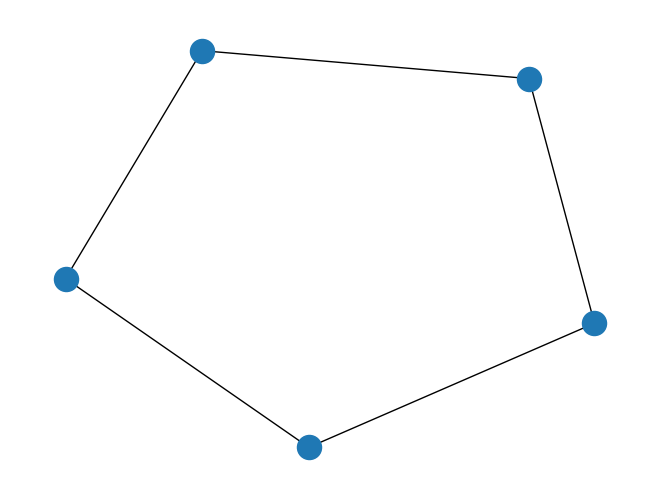

In [35]:
nx.draw(graph)
plt.show()

<p class="task" id="2"></p>

2\. Напишите функцию, генерирующую ориентированный граф из `3n + 1` узлов (`n` - параметр функции), где центральный узел соединен с тремя путями длины `n`. Ребра всегда направлены в сторону удаления от центрального узла.

Сгенерируйте граф для `n=3`. Выведите на экран количество узлов и ребер в графе. Для каждого узла выведите на экран список идентификаторов его соседей (отдельно по входящим и исходящим связям). Визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию.

- [ ] Проверено на семинаре

In [36]:
def generate_graph_or(n):
    G = nx.Graph()
    for i in range(3*n+1):
        G.add_node(i)

    for i in range(1,3*n + 1):
        u = 0
        if i%3 == 1:
            G.add_edge(u, i)
        else:
            G.add_edge(i-1, i)

    return G

In [37]:
n=3

print('кол-во узлов =', 3*n + 1)
print('кол-во ребер =',3*n)

кол-во узлов = 10
кол-во ребер = 9


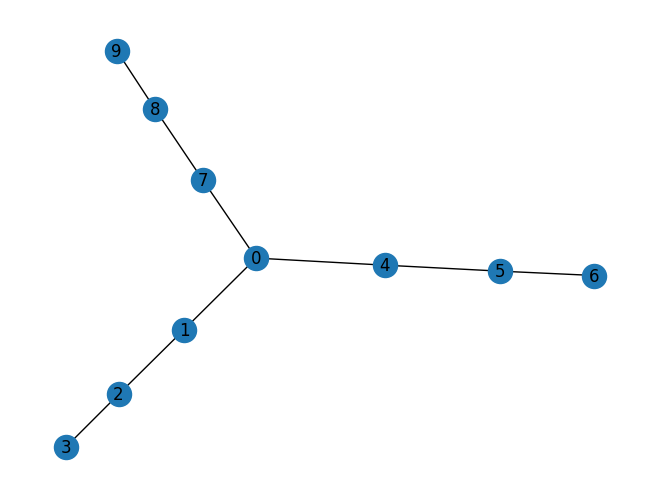

In [38]:
graph = generate_graph_or(3)

nx.draw(graph,with_labels = True)
plt.show()

<p class="task" id="3"></p>

3\. Напишите собственную функцию создания двумерной решетки `n` на `m`. В качестве идентификаторов узлов используйте пары `(x, y)`, где `x` - номер строки решетки, `y` - номер столбца решетки. Сохраните ширину и высоту решетки в виде атрибутов `n` и `m ` самого графа.

Сгенерируйте граф с n=5, m=4. Выведите на экран количество узлов и ребер в графе. Выведите созданные атрибуты графа на экран. Визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию. Создайте и визуализируйте аналогичный по структуре граф при помощи готовой функции из `networkx`.

- [ ] Проверено на семинаре

In [39]:
def create_grid_graph(n, m):
    G = nx.Graph()
    for x in range(n):
        for y in range(m):
            G.add_node((x, y))

    for x in range(n):
        for y in range(m):
            if x < n-1:
                G.add_edge((x, y), (x+1, y))
            if y < m-1:
                G.add_edge((x, y), (x, y+1))
    G.n = n
    G.m = m
    return G

In [40]:
graph = create_grid_graph(5, 4)

print("Кол-во узлов:", graph.number_of_nodes())
print("Кол-во ребер:", graph.number_of_edges())

print("Атрибуты графа:")
print("Ширина:", graph.n)
print("Высота:", graph.m)

Кол-во узлов: 20
Кол-во ребер: 31
Атрибуты графа:
Ширина: 5
Высота: 4


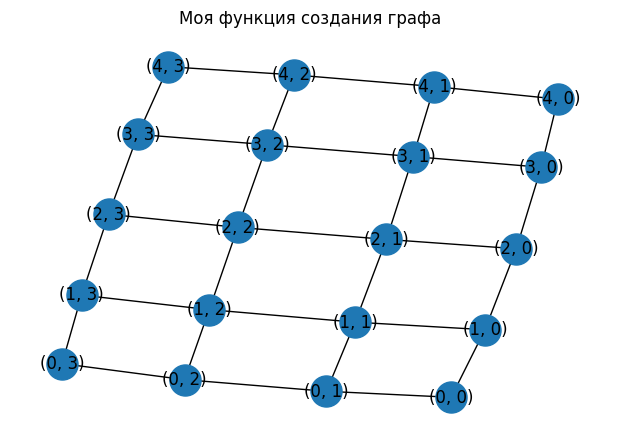

In [41]:
plt.figure(figsize=(6, 4))
nx.draw(graph, with_labels=True, node_size=500)
plt.title("Моя функция создания графа")
plt.show()

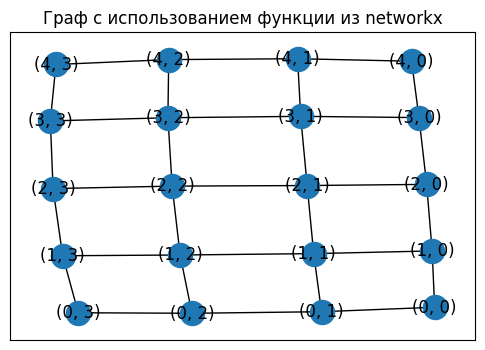

In [42]:
plt.figure(figsize=(6, 4))
nx.draw_networkx(graph, with_labels=True)
plt.title("Граф с использованием функции из networkx")
plt.show()

<p class="task" id="4"></p>

4\. Напишите функцию, которая генерирует мультиграф, состоящий из `m` узлов, где количество связей между узлами `u` и `v` сэмплится из биномиального распределения с параметрами `n` и `p` (`m`, `n`, `p` - параметры функции). Циклы в графе допускаются. На каждом ребре создайте атрибут `weight`, равный обратному значению количества ребер между индицентными ему узлами. Создайте и визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию. Создайте версию графа с удаленными петлями и визуализуйте ее.

- [ ] Проверено на семинаре

In [43]:
import numpy as np

In [44]:
def generate_multigraph(m, n, p):
    G = nx.MultiGraph()

    nodes = list(range(m))
    G.add_nodes_from(nodes)
    for u in nodes:
        for v in nodes:
            if u != v:
                num_edges = np.random.binomial(n, p)
                for _ in range(num_edges):
                    G.add_edge(u, v)

    for u, v, key, attrs in G.edges(keys=True, data=True):
        weight = 1 / len(G[u][v])
        attrs['weight'] = weight

    return G

In [59]:
graph = generate_multigraph(10, 5, 0.5)

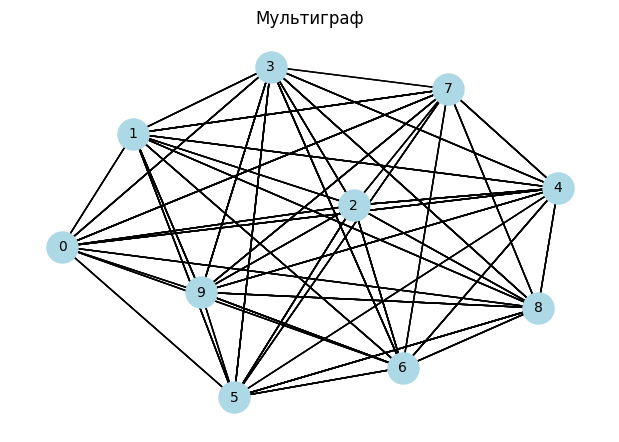

In [60]:
plt.figure(figsize=(6, 4))
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("Мультиграф")
plt.show()

In [61]:
self_loops = list(graph.edges(range(len(graph.edges)), keys=True))  # Get a list of self-loops
graph.remove_edges_from(self_loops)  # Remove the self-loops

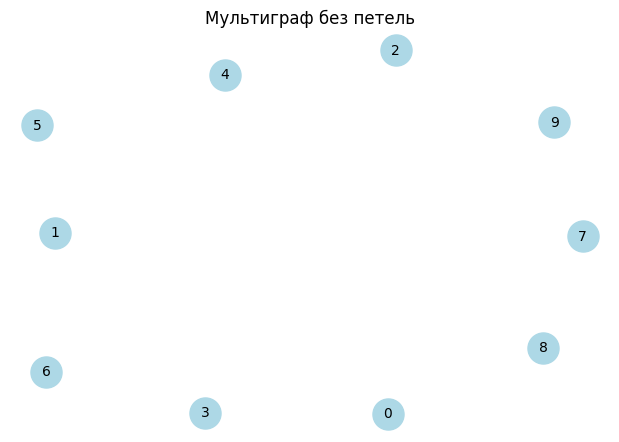

In [62]:
plt.figure(figsize=(6, 4))
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("Мультиграф без петель")
plt.show()

<p class="task" id="5"></p>

5\. Граф «(u,v) цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длиной u и v соответственно (см.рис). Реализуйте функцию построения (1, 2) цветка. Функция принимает один целочисленный параметр `n` - количество шагов построения. Создайте и визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию.

![](https://i.imgur.com/aJnbzxM.png)

- [ ] Проверено на семинаре

In [63]:
#цветок a
def build_flower_graph_a(n):
    G = nx.Graph()
    G.add_edge(0,1)
    for i in range(2,n):
        G.add_edge(i,i-1)
        G.add_edge(i,i-2)
    return G

In [64]:
flower_graph = build_flower_graph_a(3)

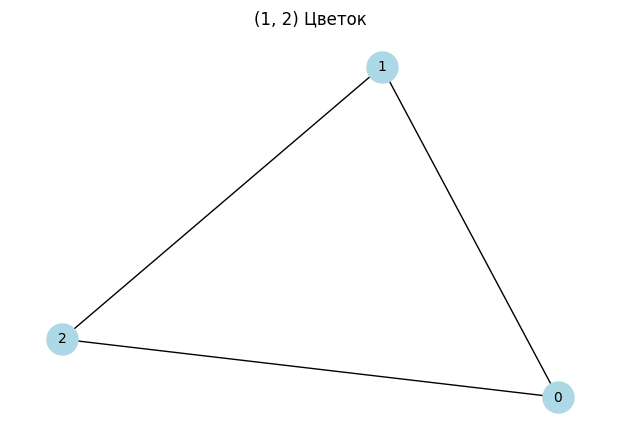

In [65]:
plt.figure(figsize=(6, 4))
nx.draw(flower_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("(1, 2) Цветок")
plt.show()

In [66]:
#цветок b
def build_flower_graph_b(n):
    G = nx.Graph()
    G.add_edge(0,1)
    G.add_edge(0,1)
    for i in range(2,n):
        G.add_edge(i, i-1, weight=1)
        G.add_edge(i, i-1, weight=2)
        G.add_edge(i, i-2, weight=1)
        G.add_edge(i, i-2, weight=2)
    return G

In [67]:
flower_graph = build_flower_graph_b(3)

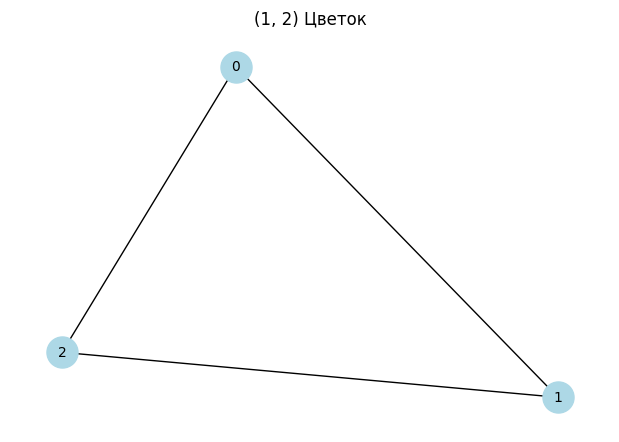

In [68]:
plt.figure(figsize=(6, 4))
nx.draw(flower_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("(1, 2) Цветок")
plt.show()

In [69]:
#цветок c
def build_flower_graph_с(n):
    G = nx.Graph()

    G.add_edge(0, 1)
    G.add_edge(1, 2)
    G.add_edge(2, 0)
    k = 2
    for i in range(n-1):
        edges = list(G.edges())
        for u, v in edges:
            k+=1
            G.add_edge(u,k)
            G.add_edge(v,k)

    return G

In [70]:
flower_graph = build_flower_graph_с(3)

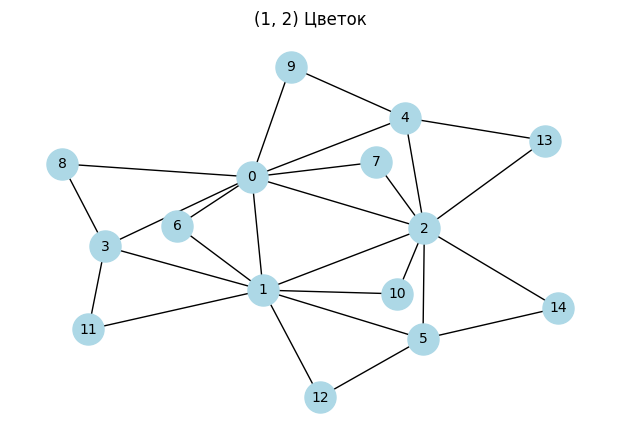

In [71]:
plt.figure(figsize=(6, 4))
nx.draw(flower_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("(1, 2) Цветок")
plt.show()

In [72]:
#цветок d
def build_flower_graph_d(n):
    G = nx.Graph()
    G.add_edge(0, 1)
    G.add_edge(0, 2)
    G.add_edge(1, 3)
    G.add_edge(2, 3)
    nach = 3
    prib = 3
    kon = 11
    kon_reb = 3
    t = 2
    nol = 12
    for i in range(2,n+1):
        t = 4 * (t - 1)#кол-во ребер
        edges = list(G.edges())
        for j in range(kon_reb,kon + 1):
            if j == nol - 1 or j == nol - 2:
                G.add_edge(j,0)
            elif j == nol:
                G.add_edge(j-nol,j+1)
                G.add_edge(j-nol,j+2)
            elif j%12 == 0 and i > 2:
                G.add_edge(j-6,j+1)
                G.add_edge(j-6,j+2)
            elif j%12 == 11 and i>2:
                G.add_edge(j,j-17)
            elif j%12 == 10 and i>2:
                G.add_edge(j,j-16)
            elif j%3 == 0:
                G.add_edge(j,j+1)
                G.add_edge(j,j+2)
            elif j%3==1:
                G.add_edge(j,j+2)
            else:
                G.add_edge(j,j+1)
        nol += 30 * 4 ** (i - 2)
        nach = nach + prib
        kon_reb = kon + 1
        kon = (kon + 1) * 4 - 1
        prib = prib * 4
        #if prib>=12:
        #    sp.insert(0,(kon+1)//4)


    return G

In [73]:
flower_graph = build_flower_graph_d(3)

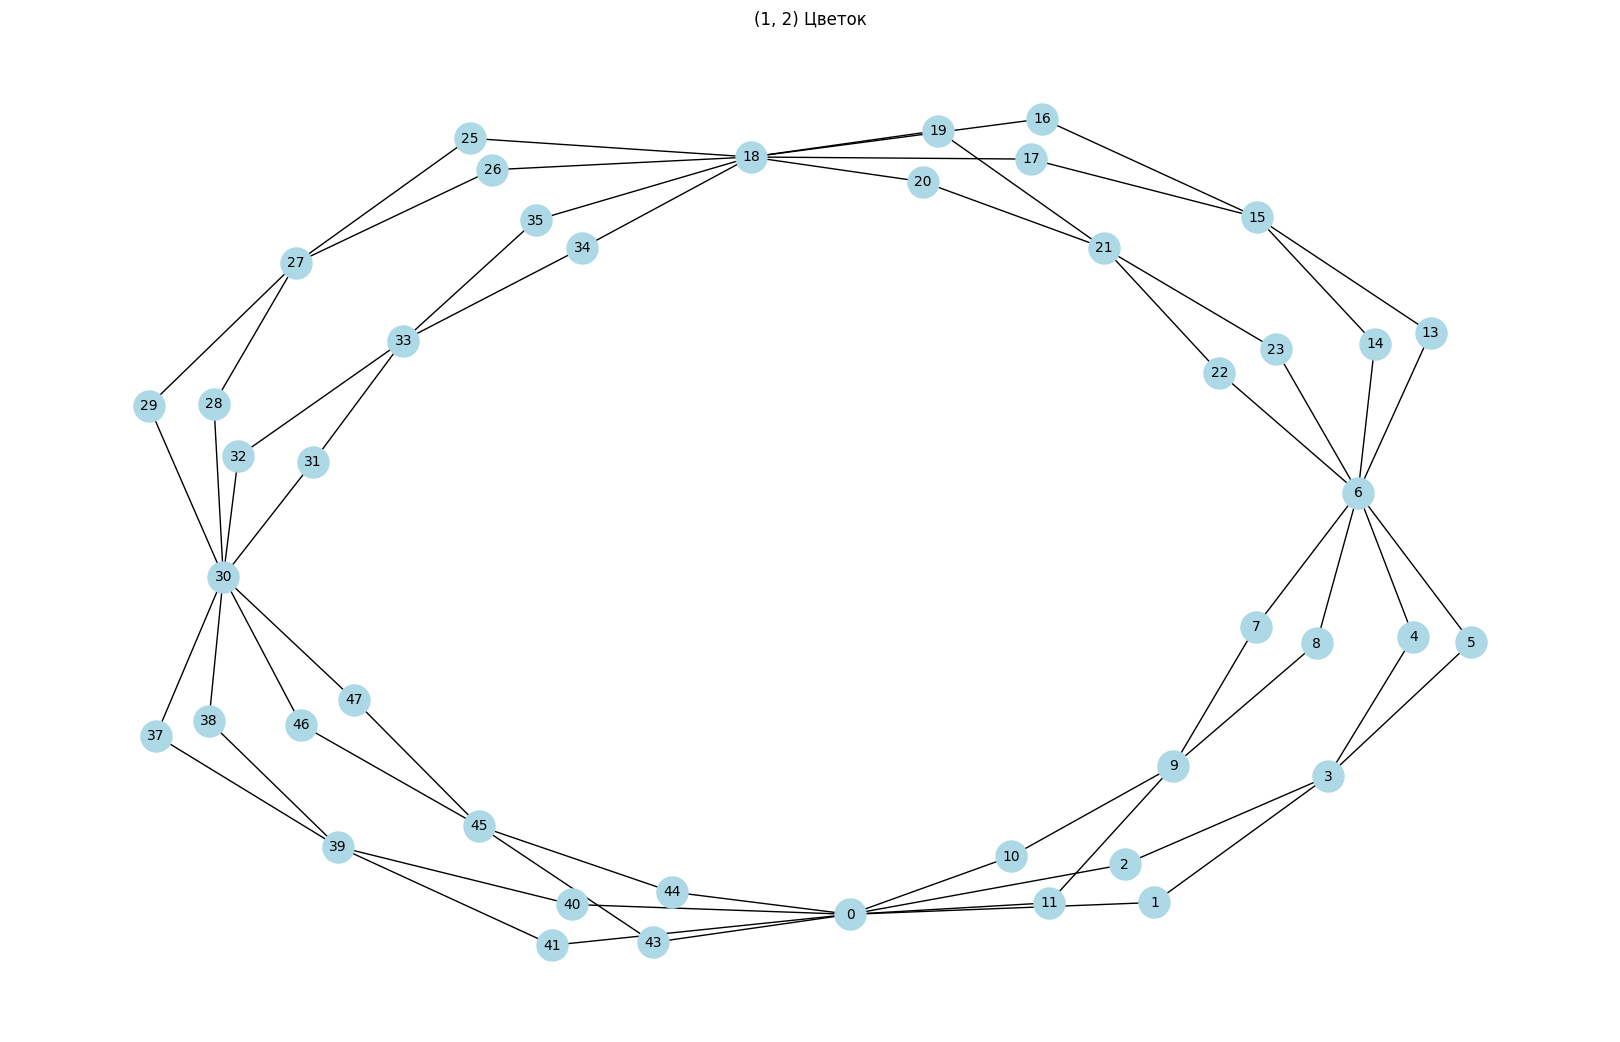

In [80]:
plt.figure(figsize=(16, 10))
nx.draw(flower_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("(1, 2) Цветок")
plt.show()